<a href="https://colab.research.google.com/github/nhwhite212/DealingwithDataSpring2021/blob/master/7-TextMining_NLP/Classifying_Inaugural_Speeches_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classifying Inaugural Speeches


#### Exercise
You are asked to identify the words that are most indicative of an Presidential inaugural speech for a given year.
For this task, you will have to do the following:
* Select the target speeches
* Treat each sentence in the target speech as a document; if the sentence is part of the target speeches, mark it as positive, otherwise mark it as negative
* Create a dataset that contains the words that appear in each "positive" and in each "negative" sentence; filter the words so that we only see words that appear in a sufficiently large number of sentences.
* Train a classifier
* See the most informative words

The NLTK toolkit contains the inaugural speeches for all presidents from 1789 till 2009.

In [6]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

If we want to see the words and/or sentences of these speeches we use the following commands:

In [7]:
speech = '2009-Obama.txt'

# Here is the list of sentences. Each sentence is a list of tokens
inaugural.sents(speech)

[['My', 'fellow', 'citizens', ':'], ['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.'], ...]

In [8]:
# Here is the first sentence
inaugural.sents(speech)[0]

['My', 'fellow', 'citizens', ':']

In [9]:
# Here is the second sentence
inaugural.sents(speech)[1]

['I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.']

In [10]:
# And here is the list of tokens
list(inaugural.words(speech))

['My',
 'fellow',
 'citizens',
 ':',
 'I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.',
 'I',
 'thank',
 'President',
 'Bush',
 'for',
 'his',
 'service',
 'to',
 'our',
 'nation',
 ',',
 'as',
 'well',
 'as',
 'the',
 'generosity',
 'and',
 'cooperation',
 'he',
 'has',
 'shown',
 'throughout',
 'this',
 'transition',
 '.',
 'Forty',
 '-',
 'four',
 'Americans',
 'have',
 'now',
 'taken',
 'the',
 'presidential',
 'oath',
 '.',
 'The',
 'words',
 'have',
 'been',
 'spoken',
 'during',
 'rising',
 'tides',
 'of',
 'prosperity',
 'and',
 'the',
 'still',
 'waters',
 'of',
 'peace',
 '.',
 'Yet',
 ',',
 'every',
 'so',
 'often',
 'the',
 'oath',
 'is',
 'taken',
 'amidst',
 'gathering',
 'clouds',
 'and',
 'raging',
 'storms',
 '.',
 'At',
 'these',
 'moments',
 ',',
 'America',
 'has'

In [11]:
import nltk

# And here is the raw text
raw_text = inaugural.raw(speech)

# And as a reminder, here are the NTLK commands for 
# splitting the text into sentences, or tokenizing it
# (See part A for more details)
sentences = nltk.sent_tokenize(raw_text)
tokens = nltk.word_tokenize(raw_text)
nltk_text = nltk.Text(tokens)

In [12]:
# Here is the list of (non-tokenized) sentences
sentences

['My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors.',
 'I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.',
 'Forty-four Americans have now taken the presidential oath.',
 'The words have been spoken during rising tides of prosperity and the still waters of peace.',
 'Yet, every so often the oath is taken amidst gathering clouds and raging storms.',
 'At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.',
 'So it has been.',
 'So it must be with this generation of Americans.',
 'That we are in the midst of crisis is now well understood.',
 'Our nation is at war, against a far-reaching network of violence and hatred.',

In [15]:
# And here is an example of doing POS tagging on the second sentence
# First we need to download the 'POS tagger'
nltk.download('averaged_perceptron_tagger')
sent_tokens = nltk.word_tokenize(sentences[1])
nltk.pos_tag(sent_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('thank', 'VBP'),
 ('President', 'NNP'),
 ('Bush', 'NNP'),
 ('for', 'IN'),
 ('his', 'PRP$'),
 ('service', 'NN'),
 ('to', 'TO'),
 ('our', 'PRP$'),
 ('nation', 'NN'),
 (',', ','),
 ('as', 'RB'),
 ('well', 'RB'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('generosity', 'NN'),
 ('and', 'CC'),
 ('cooperation', 'NN'),
 ('he', 'PRP'),
 ('has', 'VBZ'),
 ('shown', 'VBN'),
 ('throughout', 'IN'),
 ('this', 'DT'),
 ('transition', 'NN'),
 ('.', '.')]

### Exercise

You are asked to identify the words that are most indicative of an Presidential inaugural speech for a given year. 

For this task, you will have to do the following:
* Select the target speeches
* Treat each sentence in the target speech as a document; if the sentence is part of the target speeches, mark it as positive, otherwise mark it as negative
* Create a dataset that contains the words that appear in each "positive" and in each "negative" sentence; filter the words so that we only see words that appear in a sufficiently large number of sentences.
* Train a classifier
* See the most informative words

In [16]:
# Here we define our "target" class. We will define our target class, as all the speeches
# in the 18th and 19th century
target_speeches = [u'1789-Washington.txt',  u'1793-Washington.txt',
 u'1797-Adams.txt',  u'1801-Jefferson.txt', u'1805-Jefferson.txt', u'1809-Madison.txt',
 u'1813-Madison.txt', u'1817-Monroe.txt', u'1821-Monroe.txt', u'1825-Adams.txt',
 u'1829-Jackson.txt', u'1833-Jackson.txt', u'1837-VanBuren.txt', u'1841-Harrison.txt',
 u'1845-Polk.txt', u'1849-Taylor.txt', u'1853-Pierce.txt', u'1857-Buchanan.txt',
 u'1861-Lincoln.txt', u'1865-Lincoln.txt', u'1869-Grant.txt', u'1873-Grant.txt',
 u'1877-Hayes.txt', u'1881-Garfield.txt', u'1885-Cleveland.txt', u'1889-Harrison.txt',
 u'1893-Cleveland.txt', u'1897-McKinley.txt', u'1901-McKinley.txt']

non_target_speeches = [s for s in inaugural.fileids() if s not in target_speeches]

In [17]:
# We go over all speeches, and extract the sentences (each sentence is a list, containing the words/tokens)
# If the speech is a target speech, add the sentence

# The data will contain a tuple ("pos", sentence) and ("neg", sentence)
data = []
speeches = inaugural.fileids()

for speech in speeches:
    
    if speech in target_speeches:
        tag = "pos"
    else:
        tag = "neg"
    # If we want to operate with the raw text
    raw_text = inaugural.raw(speech)
    sentences = nltk.sent_tokenize(raw_text)
    # Or, alternatively, to add the alterady tokenized sentences
    # sentences = list(inaugural.sents(speech))
    
    # We now add the sentences in our dataset, with the appropriate tag
    # We create a list comprehension for each sentence in the speech
    # and then we add all these elements into "data"
    data.extend( [(tag, sent) for sent in sentences] )
    

In [18]:
len(data)

5019

In [19]:
# This is the number of positive sentences
len([tag for (tag, s) in data if tag=='pos'])

2159

In [20]:
# This is the number of negative sentences
len([tag for (tag, s) in data if tag=='neg'])

2860

In [21]:
# from nltk.corpus import stopwords


# stop_words = stopwords.words('english')
# all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words() if w.isalpha() and w not in stop_words)
# word_features = [w for (w,f) in all_words.most_common(2000)]

def features(sentence):
    sent_tokens = nltk.word_tokenize(sentence)
    document_words = nltk.pos_tag(sent_tokens)
    features = {}
    for word, tag in document_words:
        if tag.startswith('J'):
            features['%s/%s' % (word, tag)] = True
    return features

In [22]:
labeled_features = [(features(sent), tag) for (tag, sent) in data]

In [23]:
import random
random.shuffle(labeled_features)
train_set, test_set = labeled_features[500:], labeled_features[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.696


In [24]:
classifier.show_most_informative_features(30)

Most Informative Features
             economic/JJ = True              neg : pos    =     21.0 : 1.0
             internal/JJ = True              pos : neg    =     14.5 : 1.0
           republican/JJ = True              pos : neg    =     13.6 : 1.0
               entire/JJ = True              pos : neg    =     12.7 : 1.0
              several/JJ = True              pos : neg    =     11.8 : 1.0
            patriotic/JJ = True              pos : neg    =     10.8 : 1.0
                naval/JJ = True              pos : neg    =     10.1 : 1.0
          practicable/JJ = True              pos : neg    =     10.1 : 1.0
           particular/JJ = True              pos : neg    =     10.1 : 1.0
             partisan/JJ = True              pos : neg    =     10.1 : 1.0
                happy/JJ = True              pos : neg    =      9.2 : 1.0
               actual/JJ = True              pos : neg    =      8.3 : 1.0
                ample/JJ = True              pos : neg    =      8.3 : 1.0

In [25]:
# Do not really try to understand the code below.
# It is a hack for getting the "informative features" 
# into two lists, for positive and negative terms
import math
f  = classifier._feature_probdist
mif = classifier.most_informative_features(30)
pos_features = []
neg_features = []
for (w,t) in mif:
    if t != True:
        continue
    p = f[("pos", w)]
    n = f[("neg", w)]
    l = p.logprob(t) - n.logprob(t)
    s = l/abs(l)
    word = w.split("/")[0]
    
    # print w, math.exp(abs(l)), s
    if s>0:
        pos_features.append(word)
    else:
        neg_features.append(word)

In [26]:
set(neg_features) & set(pos_features)

set()

In [27]:
from wordcloud import WordCloud

pos_wordcloud = WordCloud().generate(" ".join(pos_features))
neg_wordcloud = WordCloud().generate(" ".join(neg_features))


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)

<Figure size 1080x1080 with 0 Axes>

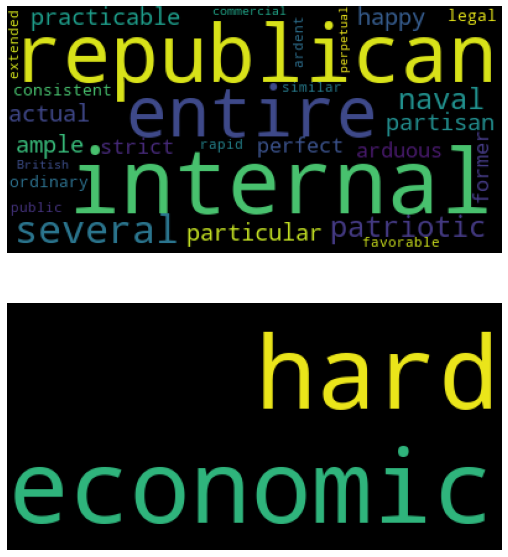

In [29]:
# Let's show it, using the "imshow" command of matplotlib


plt.figure()
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(15,10))
ax1.imshow(pos_wordcloud)
ax1.axis("off")
ax1.figsize=(15,10)
ax2.imshow(neg_wordcloud)
ax2.axis("off")

plt.axis("off")
plt.show()

In [30]:
terms = ["Justice", "Earth", "America", "World", "State", "Government", "Mississippi", "State", "Union", "Constitution"]

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street J

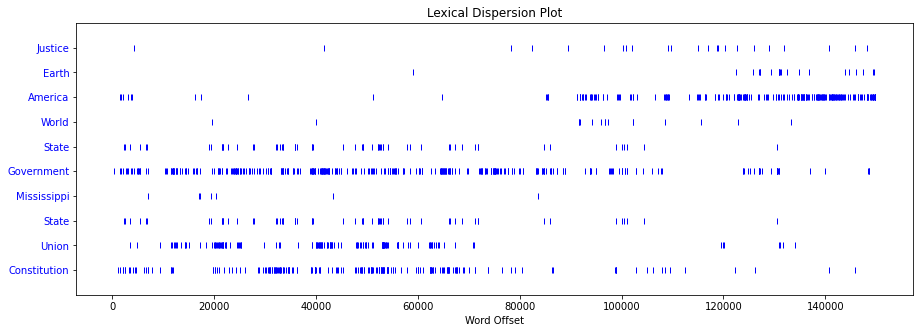

In [39]:
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
from nltk.book import *
# Text4 is the inauguration addresses
plt.rcParams['figure.figsize'] = (15, 5)
text4.dispersion_plot(terms)

In [41]:
years = [str(fileid[:4]) for fileid in inaugural.fileids()]
print (years)

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009', '2013', '2017']


In [42]:
terms = ["America",  "Government", ]
terms_years = [(target, fileid[:4]) 
               for fileid in inaugural.fileids()
               for w in inaugural.words(fileid)
               for target in terms 
               if w.lower().startswith(target.lower())]
terms_years

[('Government', '1789'),
 ('Government', '1789'),
 ('Government', '1789'),
 ('Government', '1789'),
 ('Government', '1789'),
 ('Government', '1789'),
 ('America', '1789'),
 ('Government', '1789'),
 ('America', '1789'),
 ('Government', '1789'),
 ('Government', '1789'),
 ('America', '1793'),
 ('Government', '1793'),
 ('America', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('America', '1797'),
 ('America', '1797'),
 ('Government', '1797'),
 ('Government', '1801'),
 ('Government', '1801'),
 ('Gover

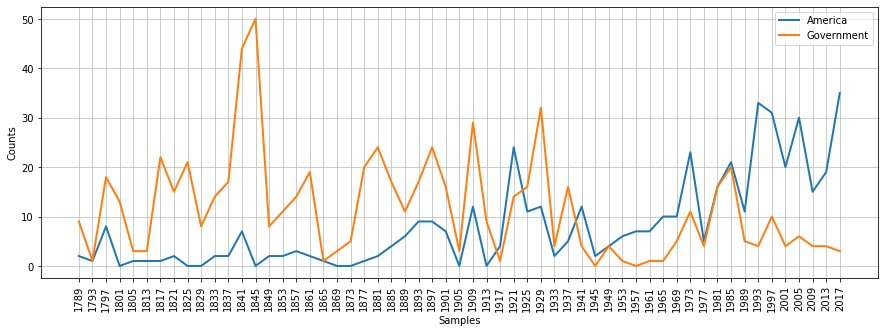

In [43]:
cfd = nltk.ConditionalFreqDist(terms_years)
cfd.plot()